# Small wind turbine performance, curve fitting and yearly output based on lab experimental data and Nottingham wind speed and direction  historical data

In [26]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from windrose import WindroseAxes
import matplotlib.cm as cm

In [27]:
file = 'data/wind turbine graphs and results.xls'
df = pd.read_excel(file, sheet_name = 'Sheet3')

In [28]:
p_air = 1.29 #[kg/m3]
D = 0.91 #[m]
A = math.pi * (D/2)**2
df['Wk'] = 0.5 * p_air * A * df['Wind Velocity']**3
df['We'] = df['V'] * df['A']
df['eff'] = df['We'] / df['Wk']

In [29]:
df

,Wind Velocity,V,A,Wk,We,eff
0,1.930,10.1,0.00,3.015812,0.000,0.000000
1,2.592,11.2,0.24,7.305289,2.688,0.367953
2,3.802,11.9,0.70,23.055191,8.330,0.361307
3,4.350,12.3,1.40,34.530284,17.220,0.498693
4,4.678,12.9,1.90,42.945042,24.510,0.570729
5,4.808,14.0,2.70,46.625742,37.800,0.810711
6,6.918,14.5,3.50,138.890984,50.750,0.365394
7,6.980,15.0,4.30,142.658827,64.500,0.452128
8,8.118,15.3,4.90,224.429283,74.970,0.334047
9,10.100,16.2,5.60,432.211683,90.720,0.209897


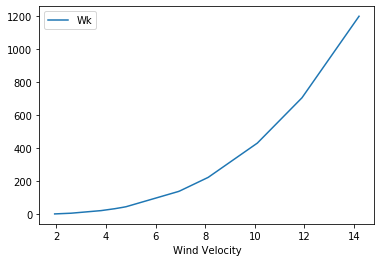

In [30]:
df.plot.line(x='Wind Velocity', y='Wk')

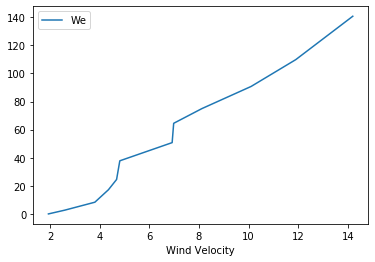

In [31]:
df.plot.line(x ='Wind Velocity', y = 'We')

In [32]:
x = df['Wind Velocity'].to_numpy()
y = df['Wk'].to_numpy()
poly_coeficient_mech = np.polyfit(x,y,3)
print(poly_coeficient_mech)
p = np.poly1d(poly_coeficient_mech)
print(p)

[ 4.19500401e-01  2.42155988e-14 -2.20303558e-13  6.14966349e-13]
        3             2
0.4195 x + 2.422e-14 x - 2.203e-13 x + 6.15e-13


In [33]:
yelec = df['We'].to_numpy()
poly_coeficient_elec = np.polyfit(x,yelec,2)
print(poly_coeficient_elec)
p_elec = np.poly1d(poly_coeficient_elec)
print(p_elec)

[ -0.05252984  12.67762182 -30.03318404]
          2
-0.05253 x + 12.68 x - 30.03


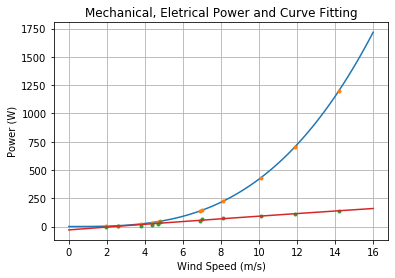

In [34]:
x = np.linspace(0,16,100)

fx = []

for i in range(len(x)):
    fx.append(p[3]*x[i]**3 +p[2]*x[i]**2 +p[1]*x[i]+p[0])

fx_elec = []

for i in range(len(x)):
    fx_elec.append( p_elec[2]*x[i]**2 +p_elec[1]*x[i]+p_elec[0])
    
    
plt.plot(x,fx,'-',df['Wind Velocity'],df['Wk'],'.', df['Wind Velocity'],df['We'],'.', x, fx_elec,'-' )

plt.title('Mechanical, Eletrical Power and Curve Fitting')

plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power (W)')
plt.grid(True)
plt.savefig('Wind Turbine.svg')
plt.show()

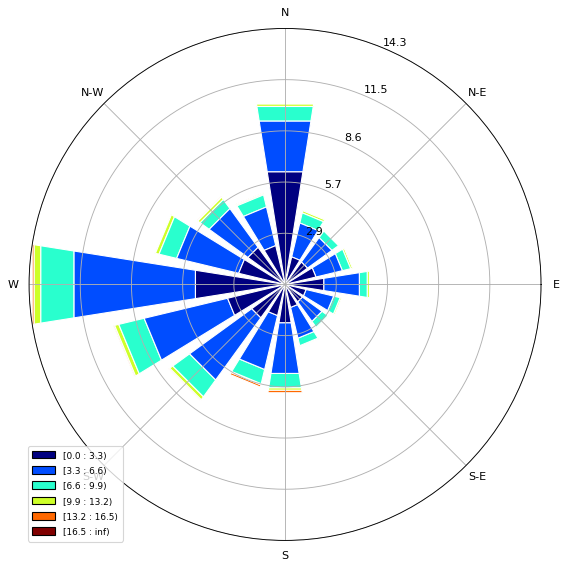

In [35]:
file = 'data/Nottingham_TRY.csv'
dfw = pd.read_csv(file)
dfw = dfw.set_index('Datetime')
dfw.index = pd.to_datetime(dfw.index)
dfw
ax = WindroseAxes.from_ax()
ax.bar(dfw['wd'], dfw['ws'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.savefig('Nottingham Wind Rose.svg')
plt.show()

In [36]:
from rosely import WindRose
WR = WindRose(dfw)
WR.plot(
    template='seaborn', colors='Plotly3',
    title='Nottingham Wind Rose'
)

Wind speed and direction statistics have not been calculated, Calculating them now using default parameters.


In [37]:
dfw['ws'].describe()

count    8760.000000
mean        4.152443
std         2.583307
min         0.000000
25%         2.400000
50%         3.800000
75%         5.700000
max        16.500000
Name: ws, dtype: float64

In [38]:
# Min speed 5 knots = 2.57 m/s

dfg = dfw[dfw['ws'] > 2.57]
dfg['W_k'] = p(dfg['ws'])
dfg['W_e'] = p_elec(dfg['ws'])
dfg.describe()

/home/jab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/jab/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,wd,ws,W_k,W_e
count,6492.000000,6492.000000,6492.000000,6492.000000
mean,211.378620,5.168022,96.002865,33.828191
std,96.004096,2.198529,168.037853,26.302062
min,10.000000,2.600000,7.373139,2.573531
25%,150.000000,3.600000,19.572211,14.925468
50%,230.000000,4.600000,40.832491,27.172345
75%,280.000000,6.200000,99.978692,46.548824
max,360.000000,16.500000,1884.448240,164.846328


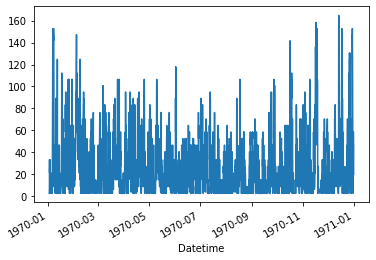

In [39]:
#sns.set_style('darkgrid')
ax.set_ylabel('Energy (Wh)')
ax.set_ylim(0, 600)
ax.set_title('Hourly Energy Output')
dfg['W_e'].plot()
plt.show()

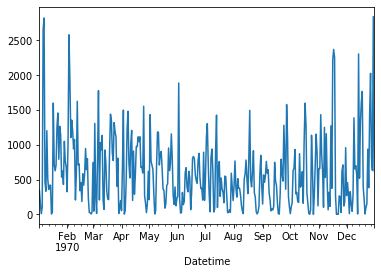

In [40]:
dfg['W_e'].resample('D').sum().plot()
plt.show()